## Cusomter_EDA

In [2]:
import numpy as nps
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [5]:
df.shape

(50000, 14)

In [6]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [7]:
# maping keys to days
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [8]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [9]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 5.3+ 

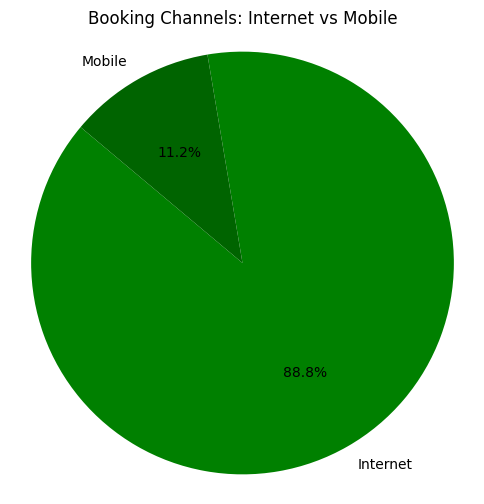

In [11]:
# pie chart of booking channels
labels = ['Internet', 'Mobile']
sizes = df['sales_channel'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['green', 'darkgreen'], startangle=140)
plt.title('Booking Channels: Internet vs Mobile')
plt.axis('equal')
plt.show()

In [12]:
# trips percentage
per_round = df.trip_type.value_counts().values[0]/ df.trip_type.count() *100
per_oneway = df.trip_type.value_counts().values[1]/ df.trip_type.count() *100
per_circle = df.trip_type.value_counts().values[2]/ df.trip_type.count() *100
print(f"Percentage of round trips: {per_round} %")
print(f"Percentage of One way trips: {per_oneway} %")
print(f"Percentage of circle trips: {per_circle} %")

Percentage of round trips: 98.994 %
Percentage of One way trips: 0.774 %
Percentage of circle trips: 0.232 %


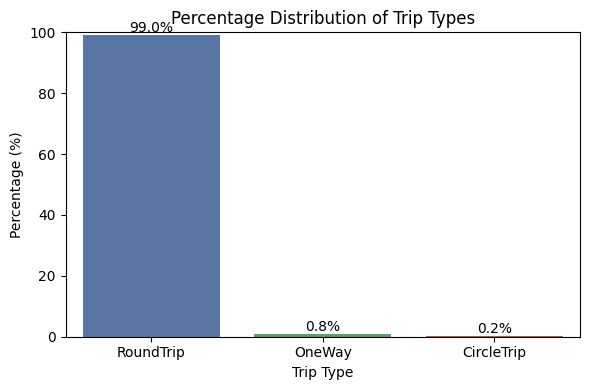

In [13]:
# bar chart for percentage distribution types
trip_type_percentages = df['trip_type'].value_counts(normalize=True) * 100
colors = ['#4c72b0', '#55a868', '#c44e52']
plt.figure(figsize=(6, 4))
sns.barplot(x=trip_type_percentages.index, y=trip_type_percentages.values, hue=trip_type_percentages.index, palette=colors, legend=False)
plt.title("Percentage Distribution of Trip Types")
plt.ylabel("Percentage (%)")
plt.xlabel("Trip Type")
plt.ylim(0, 100) 
for index, value in enumerate(trip_type_percentages.values):
    plt.text(index, value + 1, f'{value:.1f}%', ha='center', fontsize=10)
plt.tight_layout() 
plt.show()

In [14]:
(df.purchase_lead >600).value_counts()

purchase_lead
False    49992
True         8
Name: count, dtype: int64

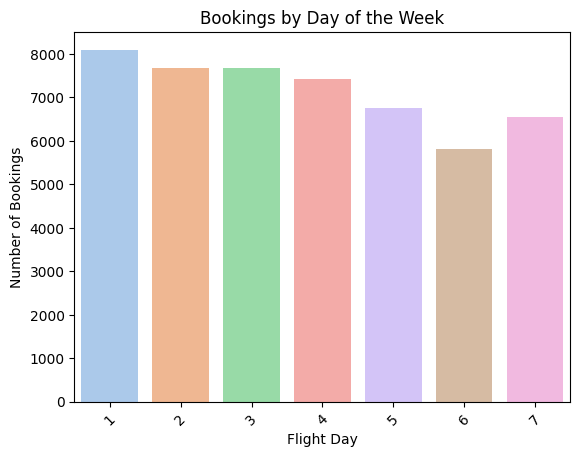

In [15]:
# bar chart day of the week 
day_counts = df['flight_day']
sns.barplot(x=day_counts.index, y=day_counts.values, hue=day_counts.index, palette='pastel', legend=False)

plt.title("Bookings by Day of the Week")
plt.ylabel("Number of Bookings")
plt.xlabel("Flight Day")
plt.xticks(rotation=45) 
plt.show()

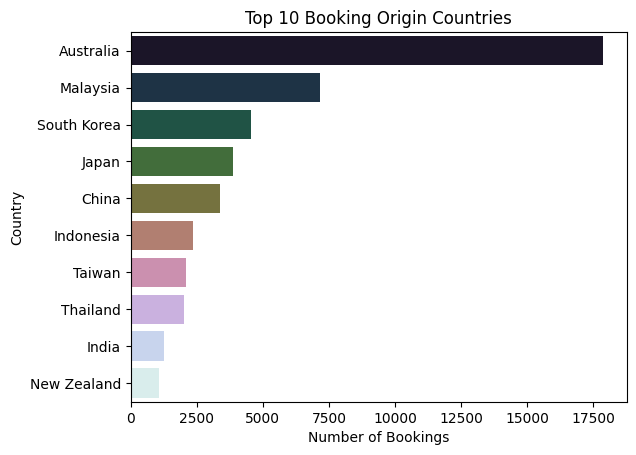

In [16]:
# top booking origing countries
top_countries = df['booking_origin'].value_counts().head(10)

sns.barplot(x=top_countries.values, y=top_countries.index, hue=top_countries.index, palette='cubehelix', legend=False)

plt.title("Top 10 Booking Origin Countries")
plt.xlabel("Number of Bookings")
plt.ylabel("Country")
plt.show()

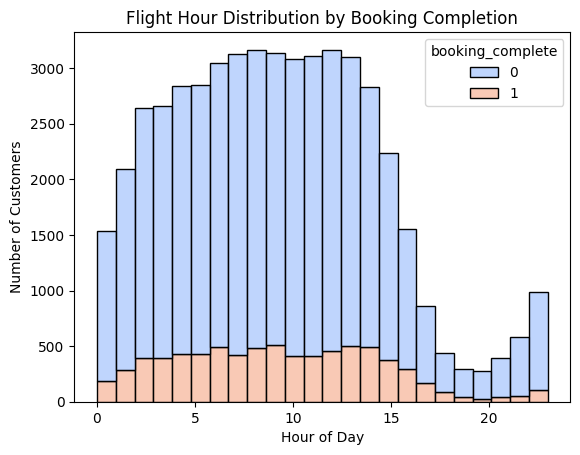

In [56]:
# bar chart flight hour distribution by booking completion
sns.histplot(data=df, x='flight_hour', bins=24, hue='booking_complete', multiple='stack', palette='coolwarm')
plt.title("Flight Hour Distribution by Booking Completion")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Customers")
plt.show()

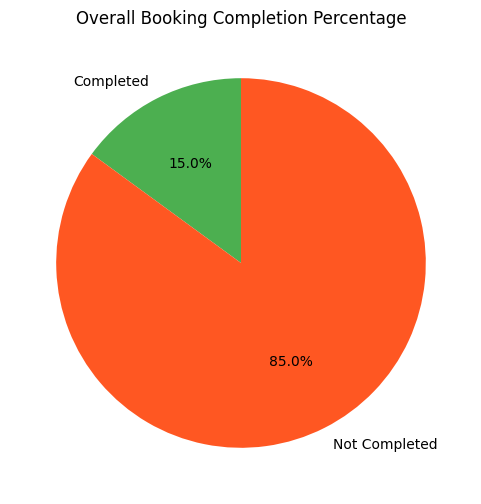

In [57]:
# overall booking completion percentage
total = len(df)
completed = df['booking_complete'].sum()
not_completed = total - completed

percent_completed = (completed / total) * 100
percent_not_completed = 100 - percent_completed

plt.figure(figsize=(6,6))
plt.pie([percent_completed, percent_not_completed], labels=['Completed', 'Not Completed'], 
        colors=['#4CAF50', '#FF5722'], autopct='%1.1f%%', startangle=90)
plt.title('Overall Booking Completion Percentage')
plt.show()


In [17]:
completion_by_channel = df.groupby('sales_channel')['booking_complete'].mean() * 100
print("Booking completion rate by sales channel (%):")
print(completion_by_channel)

completion_by_route = df.groupby('route')['booking_complete'].mean().sort_values(ascending=False) * 100
print("\nBooking completion rate by route (%):")
print(completion_by_route.head(10))  # top 10 routes

df['lead_time_bucket'] = pd.cut(df['purchase_lead'], bins=[-1,7,30,90,365], labels=['<1 week','1wk-1mo','1mo-3mo','3mo+'])

completion_by_lead_time = df.groupby('lead_time_bucket', observed=False)['booking_complete'].mean() * 100
print("\nBooking completion rate by purchase lead time (%):")
print(completion_by_lead_time)

for col in ['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']:
    completion_by_pref = df.groupby(col)['booking_complete'].mean() * 100
    print(f"\nBooking completion rate by {col}:")
    print(completion_by_pref)

Booking completion rate by sales channel (%):
sales_channel
Internet    15.476995
Mobile      10.840157
Name: booking_complete, dtype: float64

Booking completion rate by route (%):
route
AORPER    100.0
MELNRT    100.0
KOSSYD    100.0
KCHMRU    100.0
KTMURT    100.0
CKGKNO    100.0
HDYOOL    100.0
TGGXIY    100.0
AORPUS    100.0
CXRMEL    100.0
Name: booking_complete, dtype: float64

Booking completion rate by purchase lead time (%):
lead_time_bucket
<1 week    17.348847
1wk-1mo    16.096057
1mo-3mo    14.569498
3mo+       13.752665
Name: booking_complete, dtype: float64

Booking completion rate by wants_extra_baggage:
wants_extra_baggage
0    11.502929
1    16.666168
Name: booking_complete, dtype: float64

Booking completion rate by wants_preferred_seat:
wants_preferred_seat
0    13.794379
1    17.706088
Name: booking_complete, dtype: float64

Booking completion rate by wants_in_flight_meals:
wants_in_flight_meals
0    14.139580
1    16.050943
Name: booking_complete, dtype: float64


In [59]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,lead_time_bucket
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,3mo+
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,3mo+
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,3mo+
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,3mo+
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,1mo-3mo


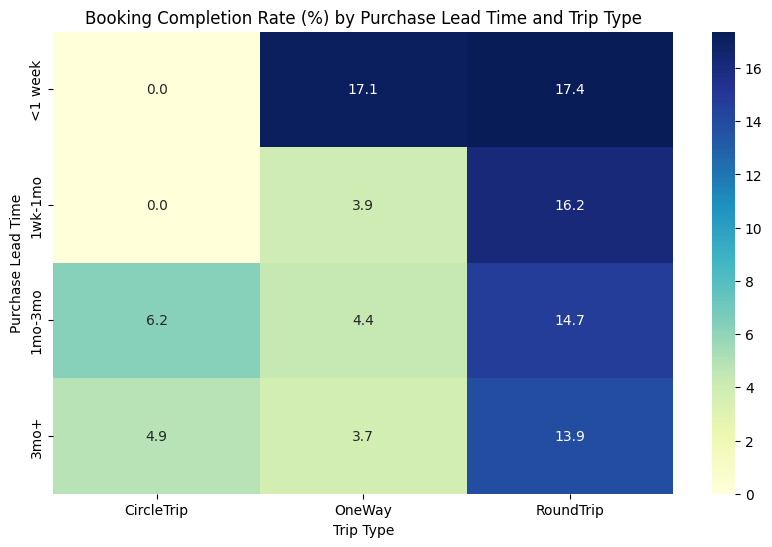

In [18]:
# heatmap booking completiopn rate by purchase lead type and trip type
df['lead_time_bucket'] = pd.cut(df['purchase_lead'], bins=[-1,7,30,90,365], labels=['<1 week','1wk-1mo','1mo-3mo','3mo+'])

completion_pivot = df.groupby(['lead_time_bucket', 'trip_type'], observed=False)['booking_complete'].mean().reset_index()

completion_pivot_pivot = completion_pivot.pivot(index='lead_time_bucket', columns='trip_type', values='booking_complete')

plt.figure(figsize=(10,6))
sns.heatmap(completion_pivot_pivot * 100, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Booking Completion Rate (%) by Purchase Lead Time and Trip Type')
plt.ylabel('Purchase Lead Time')
plt.xlabel('Trip Type')
plt.show()

In [61]:
df.to_csv('Customerdata_EDA.csv', index=False)